In [58]:
# Notes:

# data downloaded from yahoo finance over past 20 years from Jan 3, 2000 to Apr 3, 2020
# dates are inconsistent because stock market only open on business days

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from datetime import datetime
import scipy.stats as stats
import calendar
plt.style.use('ggplot')

In [60]:
nasdaq = pd.read_csv('../data/^IXIC.csv')
nasdaq

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000
1,2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
2,2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
3,2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
4,2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000
...,...,...,...,...,...,...,...
5091,2020-03-30,7583.459961,7784.350098,7539.970215,7774.149902,7774.149902,3846900000
5092,2020-03-31,7740.060059,7880.310059,7642.859863,7700.100098,7700.100098,4059700000
5093,2020-04-01,7459.500000,7566.370117,7301.979980,7360.580078,7360.580078,3685510000
5094,2020-04-02,7317.450195,7501.700195,7307.950195,7487.310059,7487.310059,3608190000


In [61]:
nasdaq.nunique(axis=0)

Date         5096
Open         5052
High         5048
Low          5062
Close        5056
Adj Close    5056
Volume       4994
dtype: int64

In [62]:
nasdaq.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5096.000000,5096.000000,5096.000000,5096.000000,5096.000000,5.096000e+03
mean,3536.508114,3560.362976,3509.459324,3536.208545,3536.208545,1.944637e+09
std,1979.491963,1988.590634,1969.554031,1980.055000,1980.055000,4.448046e+08
min,1116.760010,1135.890015,1108.489990,1114.109985,1114.109985,1.494100e+08
25%,2089.385009,2102.282593,2072.612610,2087.897461,2087.897461,1.691538e+09
50%,2657.630005,2672.805054,2637.844971,2656.204956,2656.204956,1.897680e+09
75%,4731.087402,4761.789917,4700.775024,4727.447632,4727.447632,2.141898e+09
max,9799.200195,9838.370117,9777.099609,9817.179688,9817.179688,5.301170e+09


In [63]:
nasdaq['Close'].idxmax()
#max close at index 5063
nasdaq.iloc[5063:5064]
#date max close on 2020-02-19

,Date,Open,High,Low,Close,Adj Close,Volume
5063,2020-02-19,9782.80957,9838.370117,9777.099609,9817.179688,9817.179688,2462530000


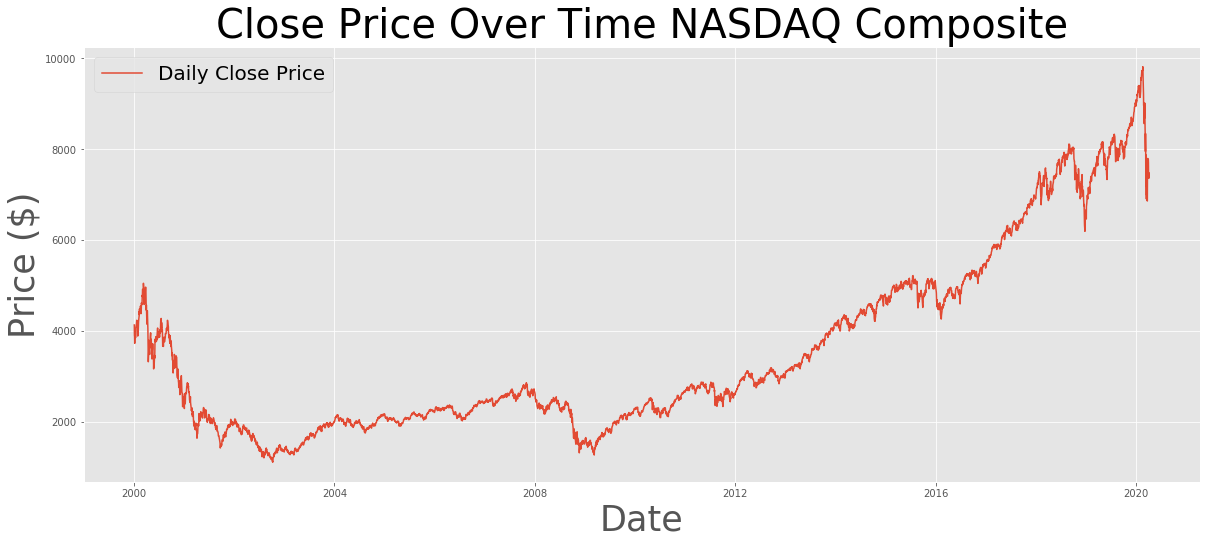

In [64]:
#Add Datetime format column
nasdaq['Date_num'] = nasdaq['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

fig, ax = plt.subplots(1, figsize = (20, 8))

dates = nasdaq['Date_num'].to_list()
ax.plot(dates, nasdaq['Adj Close'], label = "Daily Close Price")

ax.set_xlabel('Date', fontsize = 35)
ax.set_ylabel('Price ($)', fontsize = 35)
ax.set_title('Close Price Over Time NASDAQ Composite', fontsize = 40)
ax.legend(fontsize = 20)

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=15) 

plt.savefig('../images/20 year nasdaq.png')

In [65]:
#Copy nasdaq df
df = nasdaq.copy()

#Add Datetime format column

df['Date_num'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

#Add Year, Month, Day column

df['Year'] = df['Date'].apply(lambda x: "".join(x.split("-")[0]))
df['Month'] = df['Date'].apply(lambda x: "".join(x.split("-")[1]))
df['Day'] = df['Date'].apply(lambda x: "".join(x.split("-")[2]))

#Add Close Difference Column
df['Adj Close Change'] = df['Adj Close'].diff()

#Fill starting NaN value with 0
df.fillna(0, inplace = True)

#Add Label column for increase or decrease
df['Label'] = df['Adj Close Change'].apply(lambda x: 1 if x > 0 else 0)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_num,Year,Month,Day,Adj Close Change,Label
0,2000-01-03,4186.189941,4192.189941,3989.709961,4131.149902,4131.149902,1510070000,2000-01-03,2000,01,03,0.000000,0
1,2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000,2000-01-04,2000,01,04,-229.459961,0
2,2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000,2000-01-05,2000,01,05,-24.149902,0
3,2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000,2000-01-06,2000,01,06,-150.410156,0
4,2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000,2000-01-07,2000,01,07,155.490234,1


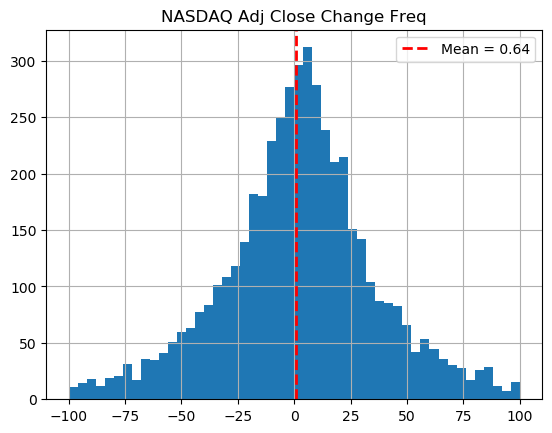

In [97]:
#note smaller bounds than Dow Jones

df['Adj Close Change'].hist(bins = 50, range=[-100, 100])
plt.axvline(df['Adj Close Change'].mean(), color='r', linestyle='dashed', linewidth=2, label = f"Mean = {df['Adj Close Change'].mean():.2f}")
plt.title('NASDAQ Adj Close Change Freq')

plt.legend()
            
mpl.rcParams.update(mpl.rcParamsDefault)
            
plt.savefig('../images/nasdaq close change hist.png')

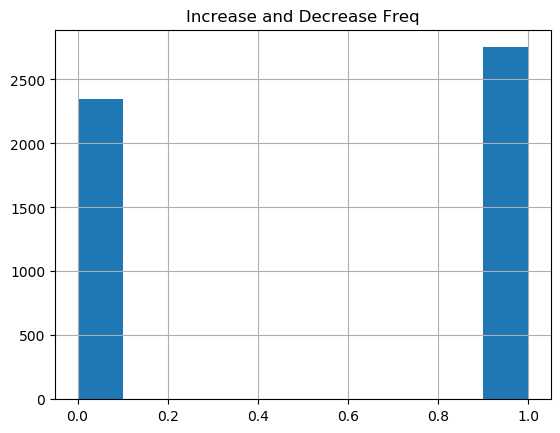

In [67]:
df['Label'].hist(bins = [0,.1, .90, 1])
plt.title('Increase and Decrease Freq')

plt.savefig('../images/nasdaq increase and decrease hist.png')

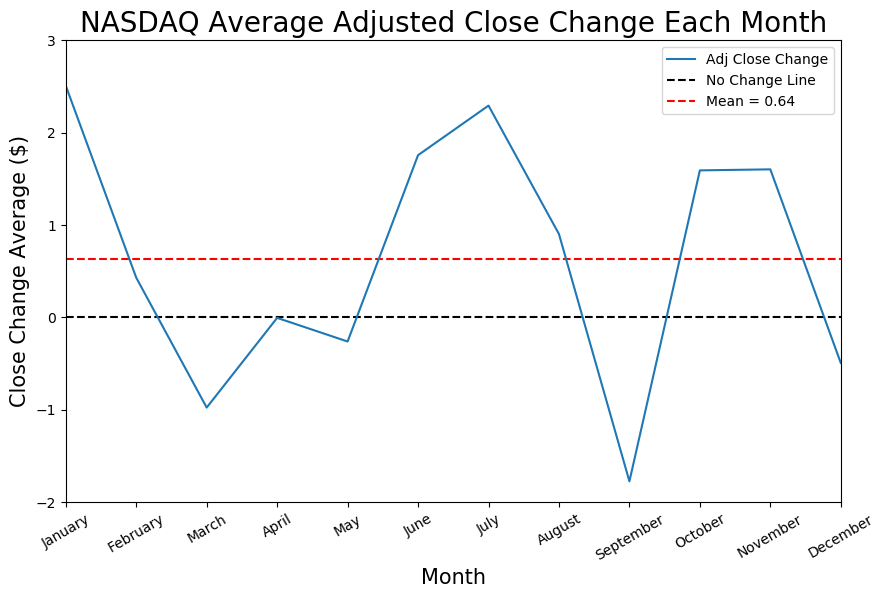

In [95]:
# Note much smaller bounds than Dow Jones

df.groupby('Month')['Adj Close Change'].mean().plot(figsize = (10, 6)).set_ylim([-2,3])

plt.hlines(0, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(df['Adj Close Change'].mean(), 0, 31, label = f"Mean = {df['Adj Close Change'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('NASDAQ Average Adjusted Close Change Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Close Change Average ($)', fontsize = 15)
locs, labels = plt.xticks()           
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=30)
           
plt.legend()
           
plt.savefig('../images/nasdaq average monthly close change.png')

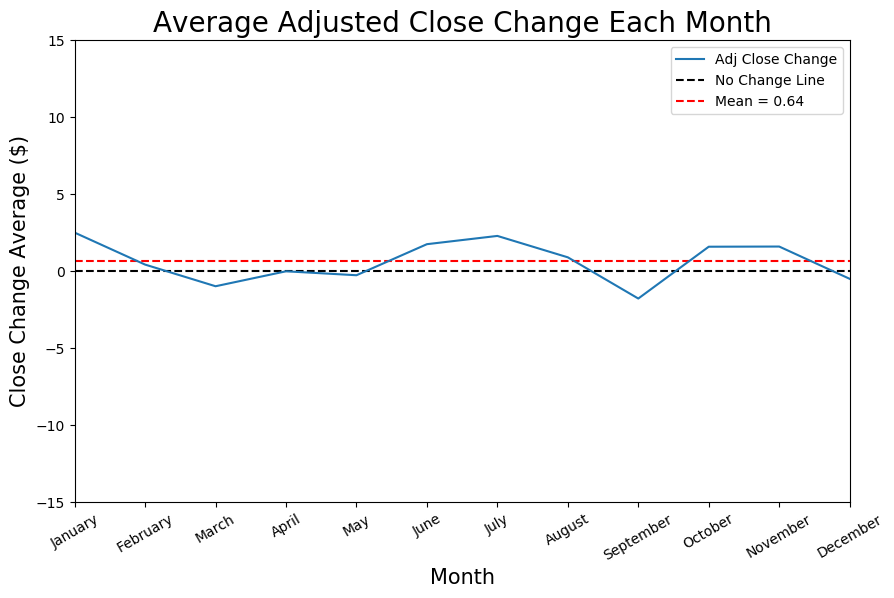

In [69]:
#Scale Comparison

df.groupby('Month')['Adj Close Change'].mean().plot(figsize = (10, 6)).set_ylim([-15,15])

plt.hlines(0, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(df['Adj Close Change'].mean(), 0, 31, label = f"Mean = {df['Adj Close Change'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('Average Adjusted Close Change Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Close Change Average ($)', fontsize = 15)
locs, labels = plt.xticks()           
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=30)
           
plt.legend()

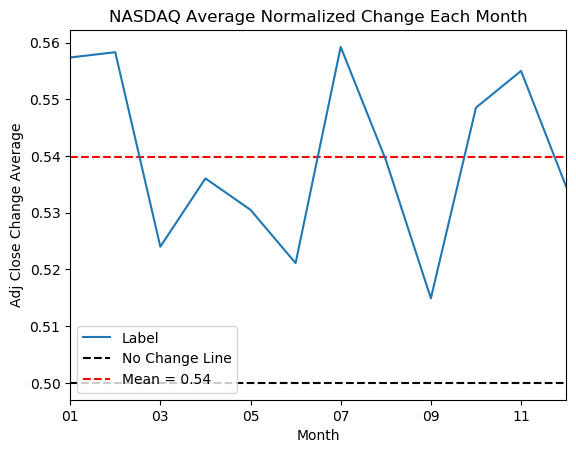

In [98]:
df.groupby('Month')['Label'].mean().plot()

plt.hlines(0.5, 0, 31, label = "No Change Line", linestyles = 'dashed')
plt.hlines(df['Label'].mean(), 0, 31, label = f"Mean = {df['Label'].mean():.2f}", linestyles = 'dashed',colors = 'r')

plt.title('NASDAQ Average Normalized Change Each Month')
plt.xlabel('Month')
plt.ylabel('Adj Close Change Average')
plt.legend()
           
plt.savefig('../images/nasdaq normalized monthly close change.png')

In [71]:
# MAKE A DATASET THAT SHOWS AN INCREASE OR DECREASE FOR EACH MONTH TO MAKE IT DISCRETE (Difference between end and beginning)
# USE RESAMPLE TO ORGANIZE DATA BY BUSINESS MONTH END
# Get frequencies for each month end increase in price
# Chi-squared on observed frequencies

In [72]:
# BMS = Business Month Start
# BM = Business Month End

resample = df[['Date_num','Adj Close Change']].resample('BM', on='Date_num').sum()

#Add Label column for increase or decrease
resample['Label'] = resample['Adj Close Change'].apply(lambda x: 1 if x > 0 else 0)
resample['Date'] = resample.index.values

resample

,Adj Close Change,Label,Date
Date_num,,,
2000-01-31,-190.799804,0,2000-01-31
2000-02-29,756.339843,1,2000-02-29
2000-03-31,-123.859863,0,2000-03-31
2000-04-28,-712.170166,0,2000-04-28
2000-05-31,-459.750000,0,2000-05-31
...,...,...,...
2019-12-31,307.129882,1,2019-12-31
2020-01-31,178.340821,1,2020-01-31
2020-02-28,-583.570313,0,2020-02-28


In [73]:
#Add Year, Month, Day Columns
resample['Year'] = resample['Date'].apply(lambda x: x.year)
resample['Month'] = resample['Date'].apply(lambda x: x.month)
resample['Day'] = resample['Date'].apply(lambda x: x.day)

# Rearrange Columns
resample = resample[['Date', 'Year', 'Month', 'Day', 'Adj Close Change', 'Label']]
resample.reset_index(drop=True)

#Remove data from 2020
years = [*range(2000, 2020)]
resample = resample.loc[resample['Year'].isin(years)]

resample

,Date,Year,Month,Day,Adj Close Change,Label
Date_num,,,,,,
2000-01-31,2000-01-31,2000,1,31,-190.799804,0
2000-02-29,2000-02-29,2000,2,29,756.339843,1
2000-03-31,2000-03-31,2000,3,31,-123.859863,0
2000-04-28,2000-04-28,2000,4,28,-712.170166,0
2000-05-31,2000-05-31,2000,5,31,-459.750000,0
...,...,...,...,...,...,...
2019-08-30,2019-08-30,2019,8,30,-212.540039,0
2019-09-30,2019-09-30,2019,9,30,36.459961,1
2019-10-31,2019-10-31,2019,10,31,293.020508,1


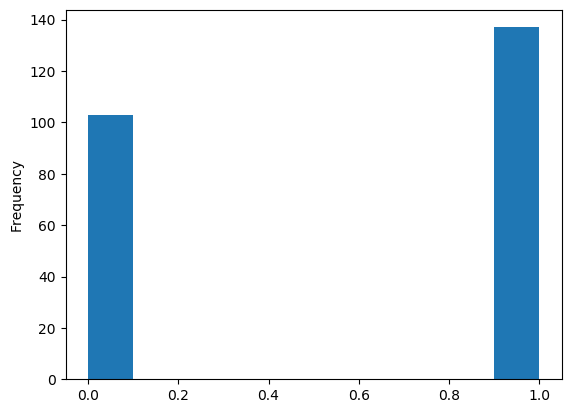

In [74]:
resample["Label"].plot(kind = 'hist')

In [75]:
monthly_increase_count = resample.groupby('Month')['Label'].sum()

monthly_increase_count

Month
1     10
2     10
3     12
4     12
5     12
6      9
7     12
8     11
9     10
10    13
11    15
12    11
Name: Label, dtype: int64

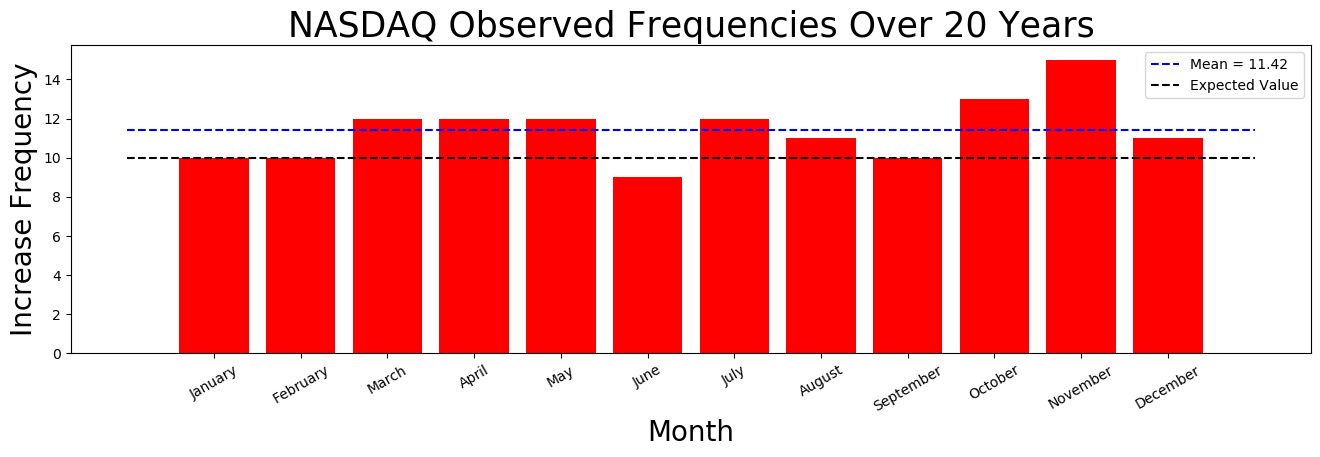

In [99]:
fig, ax = plt.subplots(1, figsize = (16, 4))
ax.bar(range(1, 13), monthly_increase_count, align='center', color = 'r');

plt.title('NASDAQ Observed Frequencies Over 20 Years', fontsize = 25)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Increase Frequency', fontsize = 20)

plt.hlines(monthly_increase_count.mean(), 0, 13, label = f"Mean = {monthly_increase_count.mean():.2f}", linestyles = 'dashed', color = 'b')
plt.hlines(10, 0, 13, label = "Expected Value", linestyles = 'dashed')

locs, labels = plt.xticks()           
plt.xticks(np.arange(1, 13), calendar.month_name[1:13], rotation=30)
mpl.rcParams.update(mpl.rcParamsDefault)


plt.legend()

plt.savefig('../images/nasdaq monthly increase freqs.png')

In [77]:
#Expected to be 10 for 12 months with 240 samples 
# (Null Hypothesis = Uniform Distribution with PMF for each month being 1/12 = 240 / 12)

monthly_increase_count_contingency_table = pd.DataFrame(
    {'expected': np.repeat(10, 12), 'actual': monthly_increase_count}
)
print(monthly_increase_count_contingency_table)

       expected  actual
Month                  
1            10      10
2            10      10
3            10      12
4            10      12
5            10      12
6            10       9
7            10      12
8            10      11
9            10      10
10           10      13
11           10      15
12           10      11


In [78]:
def chi_squared_test_statistic(observeds, expecteds):
    numerators = (observeds - expecteds)**2
    ratios = numerators / expecteds
    return np.sum(ratios)

In [79]:
#12 months choosing 1 month = 11 degrees of freedom

T = chi_squared_test_statistic(monthly_increase_count_contingency_table.actual, 
                               monthly_increase_count_contingency_table.expected)

test_distribution = stats.chi2(11)
p_value = 1 - test_distribution.cdf(T)
print("p-value for All Months: {0:.10f}".format(p_value))

p-value for All Months: 0.9157717763


In [80]:
# P-VALUE IS TOO LARGE TO CONSIDER SEASONALITY AS A BIG FACTOR
# The data generated is consistent with seasonality not being a factor

In [81]:
#The null hypothesis is that there is a uniform distribution among all months where the expected value is 149/12

#The alternate hypothesis is that not all months are the same distribution

In [82]:
#FUTURE APPLICATIONS: Use datetime to measure seasonality of other topics, such as seasonal virus or bacteria activity

In [83]:
#'BQ' = Business Quarter End
#'BA' = Business Year End
# BM = Business Month End
# BMS = Business Month Begin

last_day = df[['Date_num','Close']].resample('BM', on='Date_num').last()
first_day = df[['Date_num','Close']].resample('BMS', on='Date_num').first()

month_start_end = pd.concat([first_day, last_day]).sort_index()
month_start_end["diff"] = month_start_end['Close'].diff().fillna(0)
month_start_end["% change"] = month_start_end['Close'].pct_change().fillna(0)
month_start_end["% change"] = month_start_end["% change"] * 100

month_start_end

monthly_diff = month_start_end[['Date_num', 'Close', 'diff', '% change']].resample('BM', on='Date_num').last()
monthly_diff['Month'] = monthly_diff['Date_num'].apply(lambda x: x.month)
monthly_diff['Year'] = monthly_diff['Date_num'].apply(lambda x: x.year)

monthly_diff

,Date_num,Close,diff,% change,Month,Year
Date_num,,,,,,
2000-01-31,2000-01-31,3940.350098,-190.799804,-4.618564,1,2000
2000-02-29,2000-02-29,4696.689941,644.709961,15.910986,2,2000
2000-03-31,2000-03-31,4572.830078,-211.250000,-4.415687,3,2000
2000-04-28,2000-04-28,3860.659912,-363.020264,-8.594881,4,2000
2000-05-31,2000-05-31,3400.909912,-557.170166,-14.076779,5,2000
...,...,...,...,...,...,...
2019-12-31,2019-12-31,8972.599609,404.609375,4.722337,12,2019
2020-01-31,2020-01-31,9150.940430,58.750000,0.646159,1,2020
2020-02-28,2020-02-28,8567.370117,-706.030274,-7.613499,2,2020


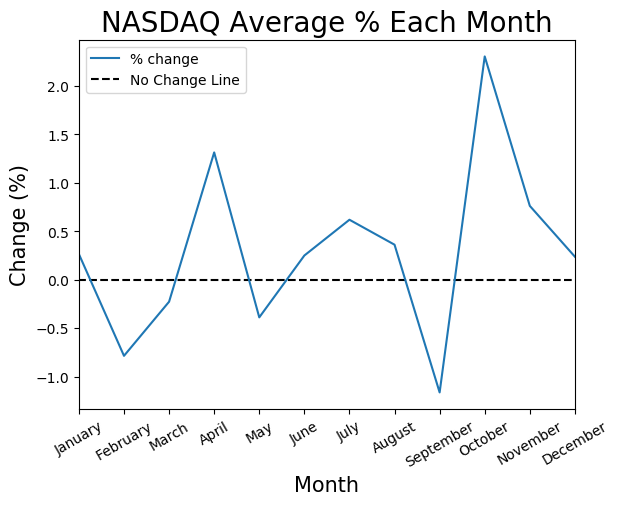

In [103]:
monthly_diff.groupby('Month')['% change'].mean().plot()

plt.title('NASDAQ Average % Each Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Change (%)', fontsize = 15)
locs, labels = plt.xticks()          
plt.xticks(np.arange(1, 13), calendar.month_name[1:13], rotation=30)
plt.hlines(0, 0, 12, label = "No Change Line", linestyles = 'dashed')           
    
plt.legend()

plt.savefig('../images/NASDAQ average monthly close change.png')

In [85]:
#Oct 31 to May 1

years = [*range(2000, 2020)]
nov_to_may = [11, 12, 1, 2, 3, 4]
may_to_nov = [5, 6, 7, 8, 9, 10]

#up to Dec 31, 2019

halloween = monthly_diff.loc[monthly_diff['Month'].isin(nov_to_may) & monthly_diff['Year'].isin(years)]
go_away = monthly_diff.loc[monthly_diff['Month'].isin(may_to_nov) & monthly_diff['Year'].isin(years)]

halloween

,Date_num,Close,diff,% change,Month,Year
Date_num,,,,,,
2000-01-31,2000-01-31,3940.350098,-190.799804,-4.618564,1,2000
2000-02-29,2000-02-29,4696.689941,644.709961,15.910986,2,2000
2000-03-31,2000-03-31,4572.830078,-211.250000,-4.415687,3,2000
2000-04-28,2000-04-28,3860.659912,-363.020264,-8.594881,4,2000
2000-11-30,2000-11-30,2597.929932,-735.459961,-22.063424,11,2000
...,...,...,...,...,...,...
2019-02-28,2019-02-28,7532.529785,268.659668,3.698575,2,2019
2019-03-29,2019-03-29,7729.319824,133.969726,1.763839,3,2019
2019-04-30,2019-04-30,8095.390137,266.479981,3.403794,4,2019


In [86]:
df1 = halloween.groupby('Month')['diff', '% change'].mean()
df2 = go_away.groupby('Month')['diff', '% change'].mean()
df1.sum(), df2.sum()

(diff        108.992016
 % change      2.637483
 dtype: float64, diff        81.43490
 % change     1.98747
 dtype: float64)

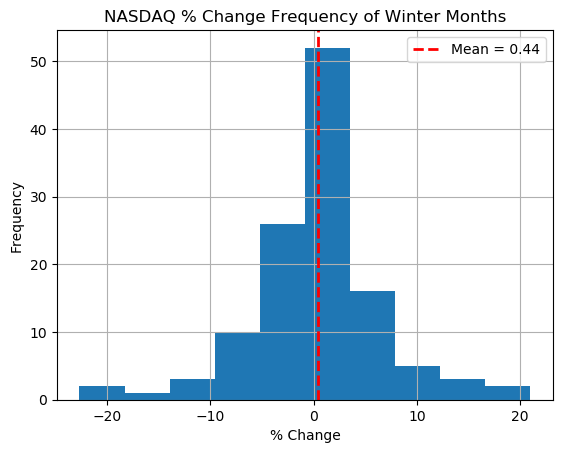

In [92]:
halloween['% change'].hist(bins = 10)

plt.axvline(halloween['% change'].mean(), color='r', linestyle='dashed', linewidth=2, label = f"Mean = {halloween['% change'].mean():.2f}")
plt.title('NASDAQ % Change Frequency of Winter Months')
plt.xlabel('% Change')
plt.ylabel('Frequency')  
            
plt.legend()
            
plt.savefig('../images/nasdaq winter hist.png')
            

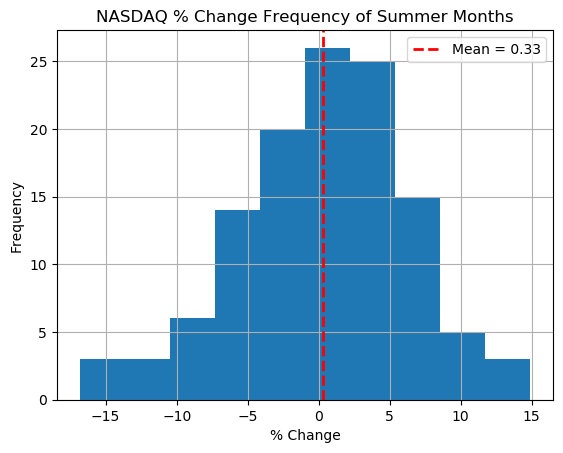

In [93]:
go_away['% change'].hist(bins = 10)

plt.axvline(go_away['% change'].mean(), color='r', linestyle='dashed', linewidth=2, label = f"Mean = {go_away['% change'].mean():.2f}")
plt.title('NASDAQ % Change Frequency of Summer Months')
plt.xlabel('% Change')
plt.ylabel('Frequency')            
            
            
plt.legend()
            
            
plt.savefig('../images/nasdaq summer hist.png')

In [88]:
# We can run a student t-test to determine if the means of the two sets are significantly different from each other
#They both appear to follow a normal distribution

def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)


def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df



In [89]:
test_statistic = welch_test_statistic(halloween['% change'], go_away['% change'])
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

degrees_freedom = welch_satterhwaithe_df(halloween['% change'], go_away['% change'])
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(degrees_freedom))



Welch Test Statistic: 0.14
Degrees of Freedom for Welch's Test: 236.35


In [90]:
students = stats.t(degrees_freedom)

p_value = students.cdf(-test_statistic) + (1 - students.cdf(test_statistic))
print("p-value for different seasons: {:2.2f}".format(p_value))


p-value for different seasons: 0.89
